In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score)

In [28]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
print("\nChurn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Distribution (%):")
print(df['Churn'].value_counts(normalize=True) * 100)


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Distribution (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [46]:
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
    print("\nDropped 'customerID' column")
else:
    print("\n✓ 'customerID' column already removed or doesn't exist")


✓ 'customerID' column already removed or doesn't exist


In [47]:
print(f"\nCurrent columns ({len(df.columns)}):")
print(df.columns.tolist())


Current columns (20):
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [48]:
print(f"\nTotalCharges data type: {df['TotalCharges'].dtype}")


TotalCharges data type: object


In [113]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [114]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [54]:
df['TotalCharges'].isnull().sum()


0

In [57]:
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    print("Converted Churn to binary (Yes=1, No=0)")
else:
    print("Churn is already in numeric format")

Churn is already in numeric format


In [58]:
print("\nCleaned dataset shape:", df.shape)
print("\nChurn distribution:")
print(df['Churn'].value_counts())


Cleaned dataset shape: (7043, 20)

Churn distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64



EXPLORATORY DATA ANALYSIS


C:\Users\LEGION\AppData\Local\Temp\ipykernel_20124\2002737827.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=['#2ecc71', '#e74c3c'])


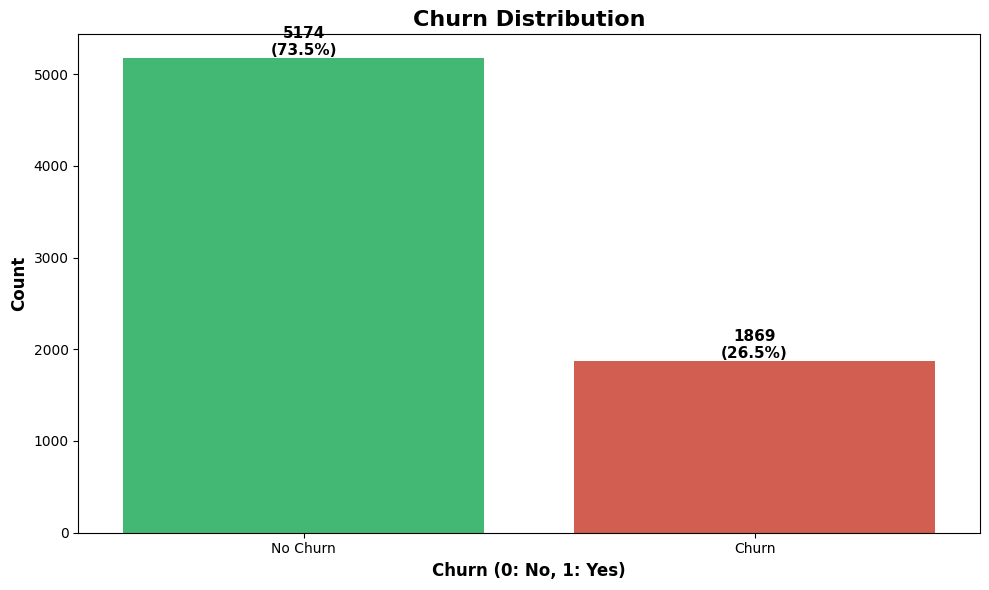

In [61]:
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Churn Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df, palette=['#2ecc71', '#e74c3c'])
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks([0, 1], ['No Churn', 'Churn'])

# Add count labels on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),
            f'{int(p.get_height())}\n({int(p.get_height())/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

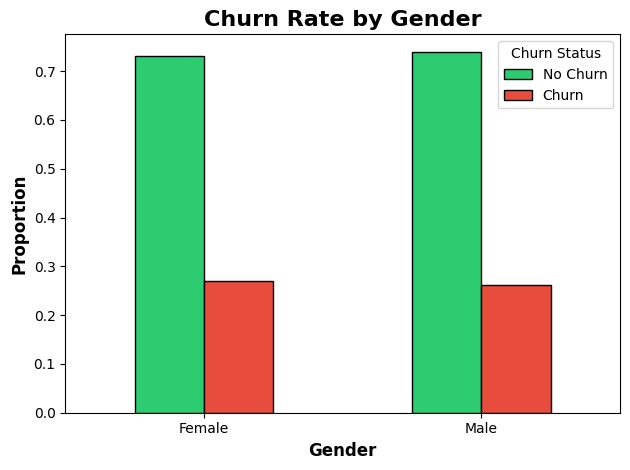

<Figure size 1000x600 with 0 Axes>

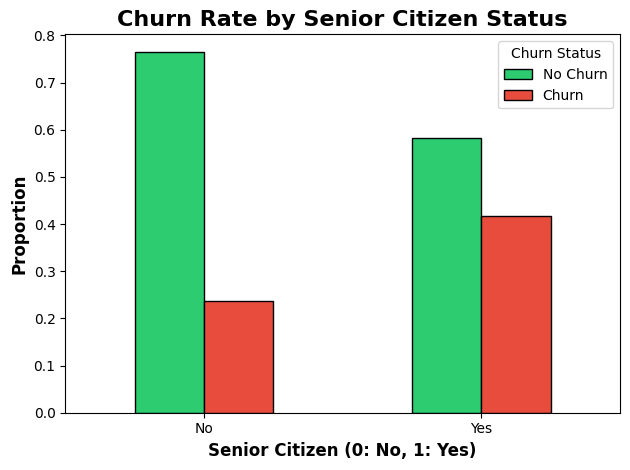

In [62]:
plt.figure(figsize=(10, 6))
pd.crosstab(df['gender'], df['Churn'], normalize='index').plot(kind='bar', 
                                                                  color=['#2ecc71', '#e74c3c'],
                                                                  edgecolor='black')
plt.title('Churn Rate by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Proportion', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churn'], title='Churn Status')
plt.tight_layout()
plt.show()

# Senior Citizen vs Churn
plt.figure(figsize=(10, 6))
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index').plot(kind='bar',
                                                                        color=['#2ecc71', '#e74c3c'],
                                                                        edgecolor='black')
plt.title('Churn Rate by Senior Citizen Status', fontsize=16, fontweight='bold')
plt.xlabel('Senior Citizen (0: No, 1: Yes)', fontsize=12, fontweight='bold')
plt.ylabel('Proportion', fontsize=12, fontweight='bold')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(['No Churn', 'Churn'], title='Churn Status')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

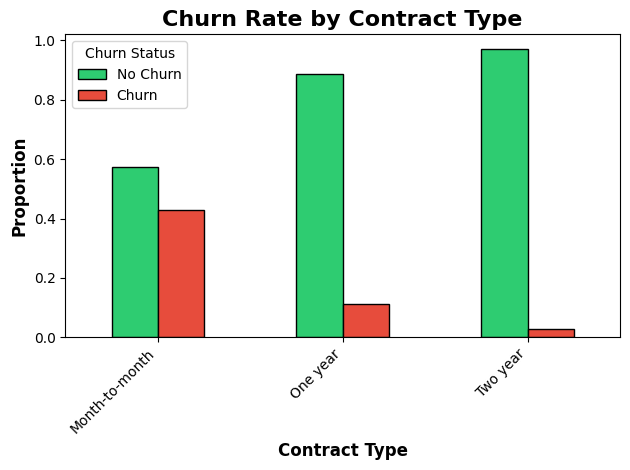

In [63]:
plt.figure(figsize=(12, 6))
pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar',
                                                                   color=['#2ecc71', '#e74c3c'],
                                                                   edgecolor='black')
plt.title('Churn Rate by Contract Type', fontsize=16, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12, fontweight='bold')
plt.ylabel('Proportion', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(['No Churn', 'Churn'], title='Churn Status')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

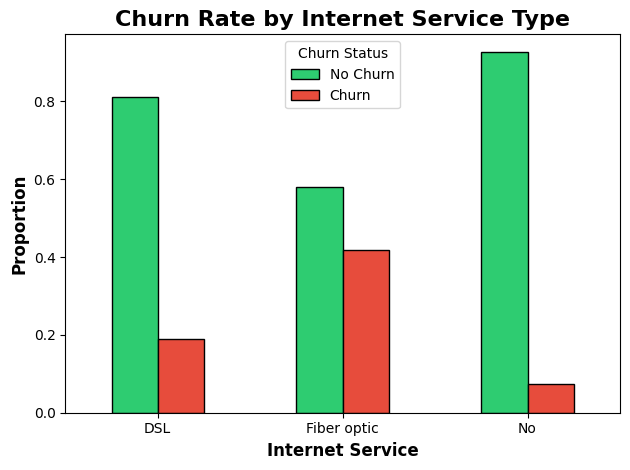

In [64]:
plt.figure(figsize=(12, 6))
pd.crosstab(df['InternetService'], df['Churn'], normalize='index').plot(kind='bar',
                                                                          color=['#2ecc71', '#e74c3c'],
                                                                          edgecolor='black')
plt.title('Churn Rate by Internet Service Type', fontsize=16, fontweight='bold')
plt.xlabel('Internet Service', fontsize=12, fontweight='bold')
plt.ylabel('Proportion', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churn'], title='Churn Status')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

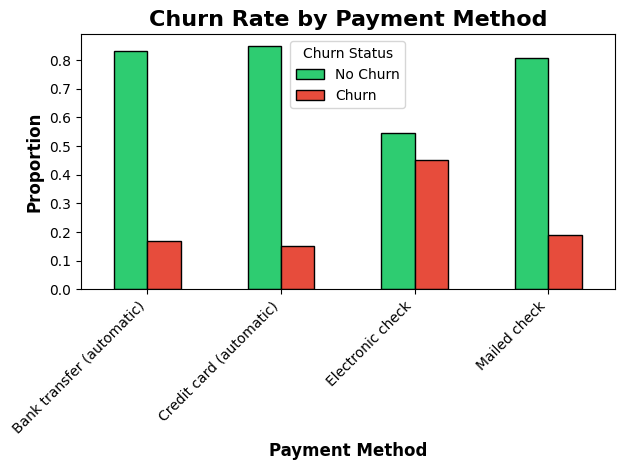

In [65]:
plt.figure(figsize=(14, 6))
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index').plot(kind='bar',
                                                                        color=['#2ecc71', '#e74c3c'],
                                                                        edgecolor='black')
plt.title('Churn Rate by Payment Method', fontsize=16, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12, fontweight='bold')
plt.ylabel('Proportion', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(['No Churn', 'Churn'], title='Churn Status')
plt.tight_layout()
plt.show()

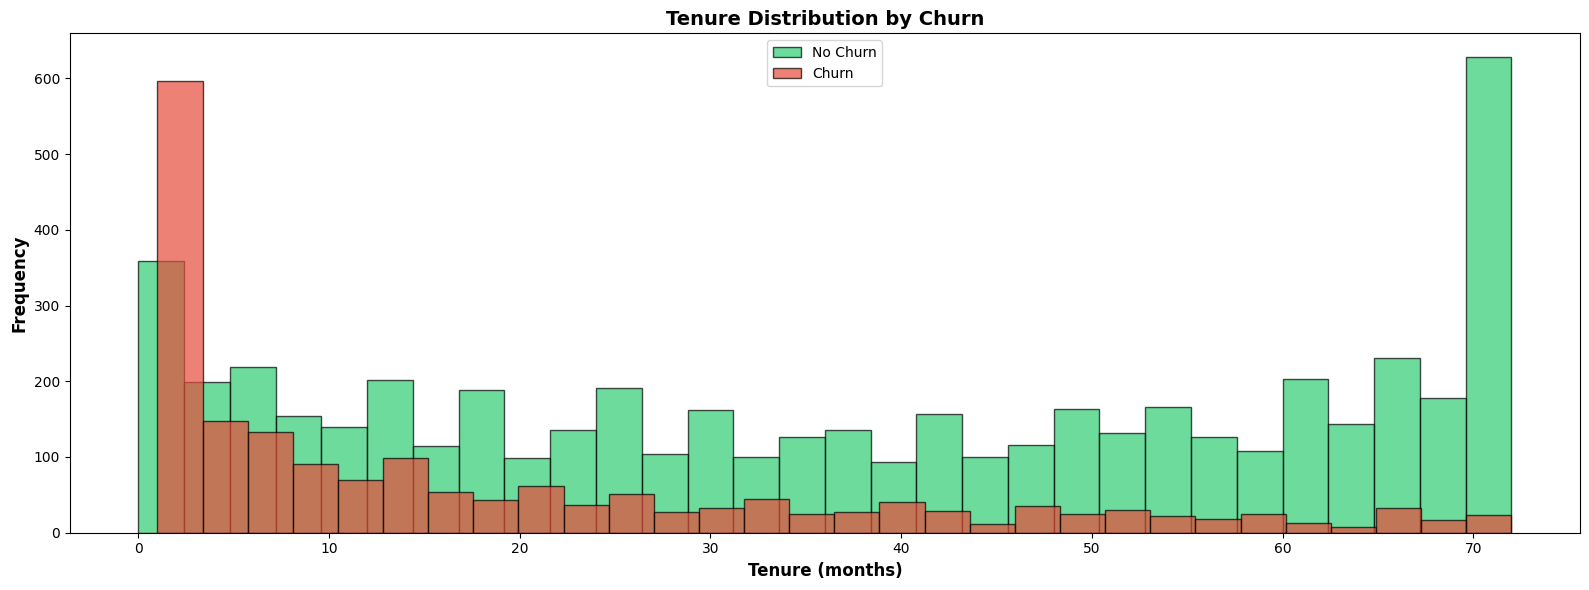

In [77]:
# Tenure Distribution
fig, axes = plt.subplots( figsize=(16, 6))

# Histogram
axes.hist(df[df['Churn'] == 0]['tenure'], bins=30, alpha=0.7, 
             label='No Churn', color='#2ecc71', edgecolor='black')
axes.hist(df[df['Churn'] == 1]['tenure'], bins=30, alpha=0.7, 
             label='Churn', color='#e74c3c', edgecolor='black')
axes.set_title('Tenure Distribution by Churn', fontsize=14, fontweight='bold')
axes.set_xlabel('Tenure (months)', fontsize=12, fontweight='bold')
axes.set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes.legend()

plt.tight_layout()
plt.show()

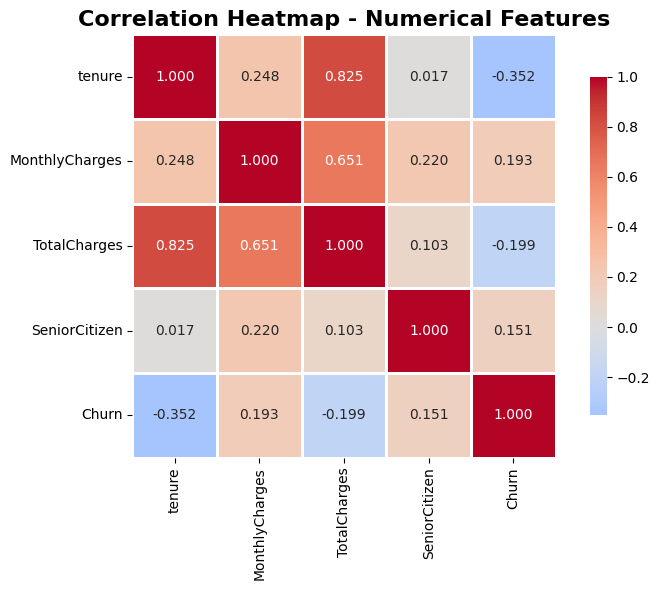


Correlation with Churn:
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn, dtype: float64


In [79]:
plt.figure(figsize=(8, 6))
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Churn:")
print(df[numerical_cols].corr()['Churn'].sort_values(ascending=False))

In [81]:

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {categorical_cols}")

# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"\nDataset shape after encoding: {df_encoded.shape}")
print(f"Number of features: {df_encoded.shape[1] - 1}") 


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Dataset shape after encoding: (7043, 31)
Number of features: 30


### PREPARE DATA FOR MODELING

In [82]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [83]:
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names ({len(X.columns)} total):")
print(X.columns.tolist())


Features shape: (7043, 30)
Target shape: (7043,)

Feature names (30 total):
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


### Train Test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [85]:
print(f"\nTraining set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set churn rate: {y_train.sum()/len(y_train)*100:.2f}%")
print(f"Test set churn rate: {y_test.sum()/len(y_test)*100:.2f}%")


Training set size: 5634 (80.0%)
Test set size: 1409 (20.0%)

Training set churn rate: 26.54%
Test set churn rate: 26.54%


### BASELINE MODEL (NO TUNING)

In [86]:
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [87]:
y_pred_baseline = baseline_dt.predict(X_test)

In [90]:
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline)
baseline_recall = recall_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)

In [91]:
print(f"\nBaseline Model Performance:")
print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"Precision: {baseline_precision:.4f}")
print(f"Recall: {baseline_recall:.4f}")
print(f"F1-Score: {baseline_f1:.4f}")

print("\nBaseline Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))


Baseline Model Performance:
Accuracy: 0.7417
Precision: 0.5139
Recall: 0.4947
F1-Score: 0.5041

Baseline Confusion Matrix:
[[860 175]
 [189 185]]


### CROSS VALIDATION

In [95]:

cv_scores = cross_val_score(baseline_dt, X_train, y_train, cv=5, scoring='accuracy')

print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.72670807 0.74267968 0.71783496 0.73558119 0.72735346]
Mean CV Score: 0.7300
Standard Deviation: 0.0085


### HYPERPARAMETER TUNING WITH GRID SEARCH

In [99]:
print("\n" + "="*60)
print("HYPERPARAMETER TUNING")
print("="*60)

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

print("\nTesting different parameters...")
print(f"Total combinations: {np.prod([len(v) for v in param_grid.values()])}")


HYPERPARAMETER TUNING

Testing different parameters...
Total combinations: 72


In [100]:
# Grid Search
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"Best score: {grid_search.best_score_:.4f}")


Best parameters found:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.7836


###  TRAIN OPTIMIZED MODEL

In [101]:
# Get best model
best_dt = grid_search.best_estimator_

# Predictions
y_pred_optimized = best_dt.predict(X_test)

In [102]:
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_precision = precision_score(y_test, y_pred_optimized)
optimized_recall = recall_score(y_test, y_pred_optimized)
optimized_f1 = f1_score(y_test, y_pred_optimized)

print(f"\nOptimized Model Results:")
print(f"Accuracy: {optimized_accuracy:.4f}")
print(f"Precision: {optimized_precision:.4f}")
print(f"Recall: {optimized_recall:.4f}")
print(f"F1-Score: {optimized_f1:.4f}")


Optimized Model Results:
Accuracy: 0.7921
Precision: 0.6484
Recall: 0.4733
F1-Score: 0.5471



COMPARING MODELS

Baseline vs Optimized:
Baseline Accuracy: 0.7417
Optimized Accuracy: 0.7921
Improvement: 0.0504


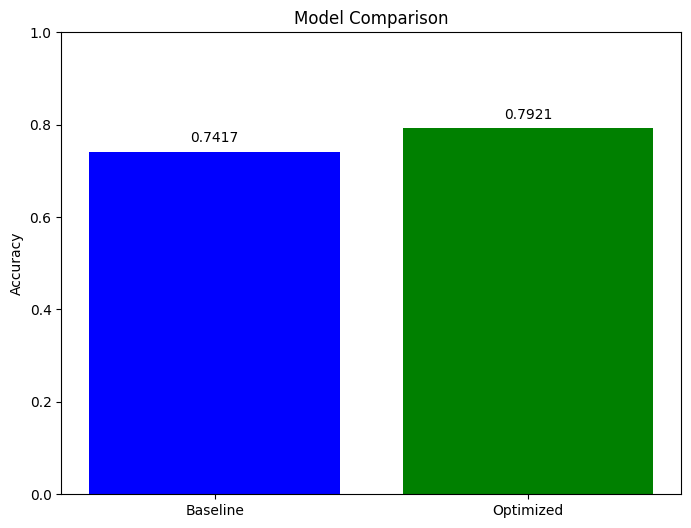

In [103]:
# ==========================================

print("\n" + "="*60)
print("COMPARING MODELS")
print("="*60)

print("\nBaseline vs Optimized:")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Optimized Accuracy: {optimized_accuracy:.4f}")
print(f"Improvement: {(optimized_accuracy - baseline_accuracy):.4f}")

# Simple bar chart
models = ['Baseline', 'Optimized']
accuracies = [baseline_accuracy, optimized_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim([0, 1])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()


Baseline Confusion Matrix:
[[860 175]
 [189 185]]

Optimized Confusion Matrix:
[[939  96]
 [197 177]]


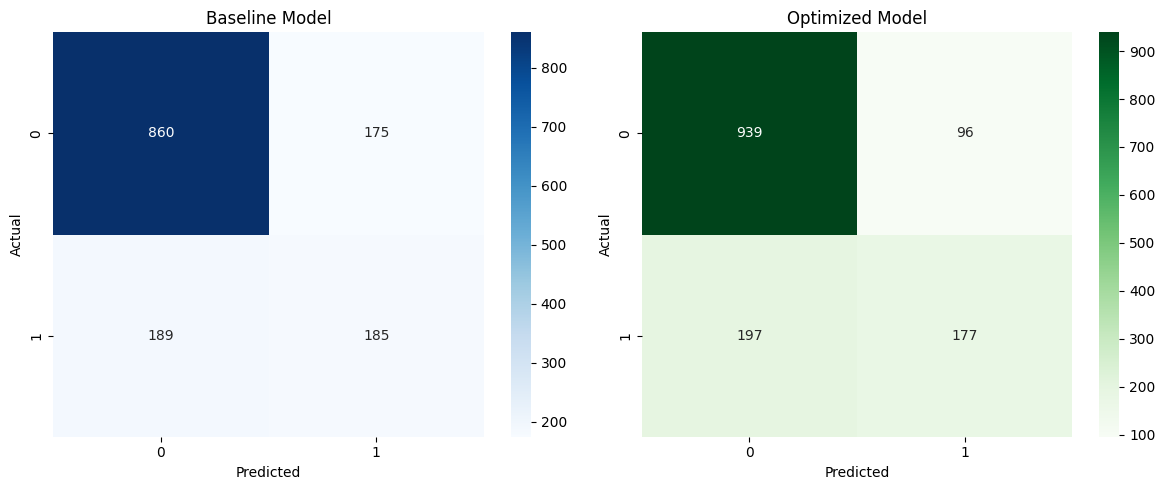

In [104]:
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print("\nBaseline Confusion Matrix:")
print(cm_baseline)

# Optimized confusion matrix
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
print("\nOptimized Confusion Matrix:")
print(cm_optimized)

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Baseline Model')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Optimized Model')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [105]:
print("\n" + "="*60)
print("CLASSIFICATION REPORTS")
print("="*60)

print("\nBaseline Model:")
print(classification_report(y_test, y_pred_baseline, target_names=['No Churn', 'Churn']))

print("\nOptimized Model:")
print(classification_report(y_test, y_pred_optimized, target_names=['No Churn', 'Churn']))



CLASSIFICATION REPORTS

Baseline Model:
              precision    recall  f1-score   support

    No Churn       0.82      0.83      0.83      1035
       Churn       0.51      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409


Optimized Model:
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1035
       Churn       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409




FEATURE IMPORTANCE

Top 15 Important Features:
                                Feature  Importance
25                    Contract_Two year    0.360114
24                    Contract_One year    0.228510
1                                tenure    0.130311
10          InternetService_Fiber optic    0.127016
2                        MonthlyCharges    0.039845
28       PaymentMethod_Electronic check    0.036916
23                  StreamingMovies_Yes    0.032479
3                          TotalCharges    0.031887
11                   InternetService_No    0.012923
22  StreamingMovies_No internet service    0.000000
20      StreamingTV_No internet service    0.000000
21                      StreamingTV_Yes    0.000000
0                         SeniorCitizen    0.000000
18      TechSupport_No internet service    0.000000
26                 PaperlessBilling_Yes    0.000000


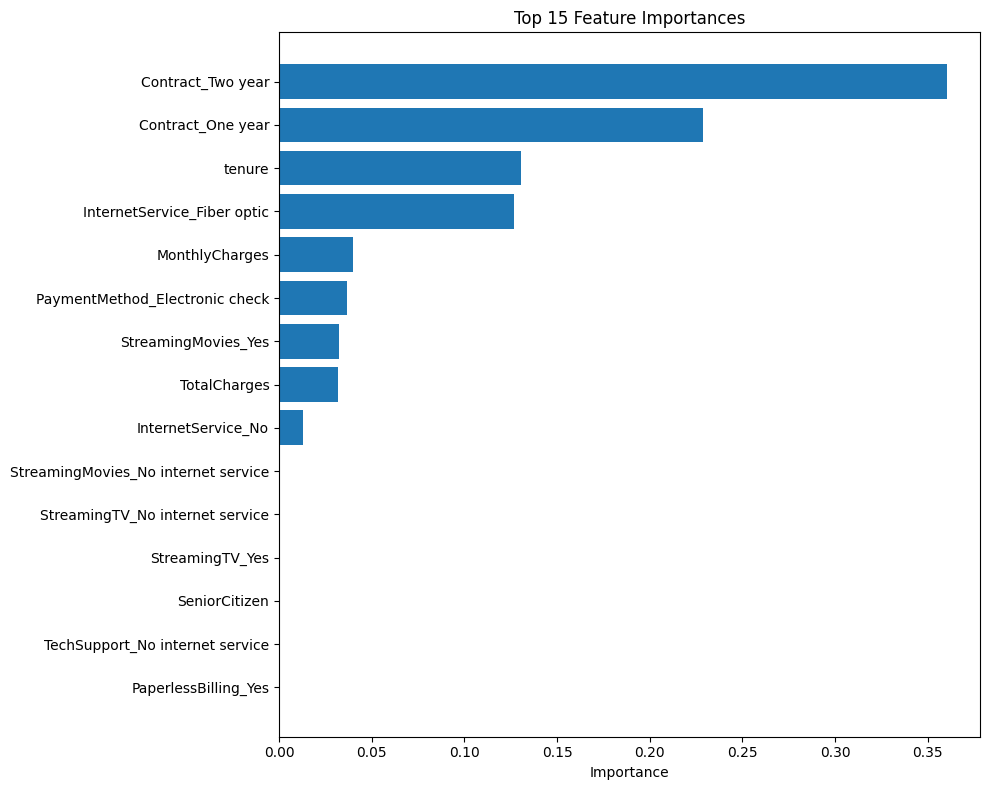

In [106]:
print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)

# Get feature importances
importances = best_dt.feature_importances_
features = X.columns

# Create dataframe
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nTop 15 Important Features:")
print(feature_df.head(15))

# Plot top 15
plt.figure(figsize=(10, 8))
top_15 = feature_df.head(15)
plt.barh(top_15['Feature'], top_15['Importance'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [108]:
print("\n" + "="*60)
print("SAMPLE PREDICTIONS")
print("="*60)

# Test on 5 random samples
for i in range(5):
    idx = np.random.choice(X_test.index)
    actual = y_test.loc[idx]
    predicted = best_dt.predict(X_test.loc[idx].values.reshape(1, -1))[0]
    prob = best_dt.predict_proba(X_test.loc[idx].values.reshape(1, -1))[0][1]
    
    print(f"\nSample {i+1}:")
    print(f"  Actual: {actual} ({'Churn' if actual == 1 else 'No Churn'})")
    print(f"  Predicted: {predicted} ({'Churn' if predicted == 1 else 'No Churn'})")
    print(f"  Probability: {prob:.3f}")
    print(f"  Correct: {actual == predicted}")


SAMPLE PREDICTIONS

Sample 1:
  Actual: 0 (No Churn)
  Predicted: 0 (No Churn)
  Probability: 0.154
  Correct: True

Sample 2:
  Actual: 1 (Churn)
  Predicted: 1 (Churn)
  Probability: 0.521
  Correct: True

Sample 3:
  Actual: 1 (Churn)
  Predicted: 1 (Churn)
  Probability: 0.661
  Correct: True

Sample 4:
  Actual: 1 (Churn)
  Predicted: 1 (Churn)
  Probability: 0.855
  Correct: True

Sample 5:
  Actual: 0 (No Churn)
  Predicted: 0 (No Churn)
  Probability: 0.036
  Correct: True


C:\Users\LEGION\Anaconda3\envs\ml_gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LEGION\Anaconda3\envs\ml_gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LEGION\Anaconda3\envs\ml_gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LEGION\Anaconda3\envs\ml_gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LEGION\Anaconda3\envs\ml_gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but 

In [109]:
print("\n" + "="*60)
print("SUMMARY")
print("="*60)

print(f"\nDataset Size: {len(df)}")
print(f"Churn Rate: {df['Churn'].mean()*100:.2f}%")
print(f"Number of Features: {X.shape[1]}")

print(f"\nFinal Model Performance:")
print(f"  Accuracy: {optimized_accuracy:.4f}")
print(f"  Precision: {optimized_precision:.4f}")
print(f"  Recall: {optimized_recall:.4f}")
print(f"  F1-Score: {optimized_f1:.4f}")

print("\nProject Complete!")


SUMMARY

Dataset Size: 7043
Churn Rate: 26.54%
Number of Features: 30

Final Model Performance:
  Accuracy: 0.7921
  Precision: 0.6484
  Recall: 0.4733
  F1-Score: 0.5471

Project Complete!
